In [143]:
# perform clustering by hierarchical method for airlines data set

In [144]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

In [145]:
airlines=pd.read_csv("F:\\excelR\\assignments\\clustring\\EastWestAirlines.csv")

In [146]:
airlines

,Unnamed: 0,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [147]:
# we drop the columns that have zero values

In [148]:
air1=airlines
air1.drop(["Qual_miles","Flight_miles_12mo","Flight_trans_12"],axis=1,inplace=True)
air1.head()

,Unnamed: 0,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award?
0,1,28143,1,1,1,174,1,7000,0
1,2,19244,1,1,1,215,2,6968,0
2,3,41354,1,1,1,4123,4,7034,0
3,4,14776,1,1,1,500,1,6952,0
4,5,97752,4,1,1,43300,26,6935,1


In [149]:
air1.describe

<bound method NDFrame.describe of       Unnamed: 0  Balance  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0              1    28143          1          1          1          174   
1              2    19244          1          1          1          215   
2              3    41354          1          1          1         4123   
3              4    14776          1          1          1          500   
4              5    97752          4          1          1        43300   
...          ...      ...        ...        ...        ...          ...   
3994        4017    18476          1          1          1         8525   
3995        4018    64385          1          1          1          981   
3996        4019    73597          3          1          1        25447   
3997        4020    54899          1          1          1          500   
3998        4021     3016          1          1          1            0   

      Bonus_trans  Days_since_enroll  Award?  
0               1 

In [150]:
from sklearn import preprocessing
air_normalized=preprocessing.normalize(air1)
print(air_normalized)

[[3.44815547e-05 9.70414393e-01 3.44815547e-05 ... 3.44815547e-05
  2.41370883e-01 0.00000000e+00]
 [9.77144636e-05 9.40208568e-01 4.88572318e-05 ... 9.77144636e-05
  3.40437191e-01 0.00000000e+00]
 [7.11742344e-05 9.81113097e-01 2.37247448e-05 ... 9.48989792e-05
  1.66879855e-01 0.00000000e+00]
 ...
 [5.15333231e-02 9.43691958e-01 3.84672728e-05 ... 1.02579394e-04
  1.79770388e-02 1.28224243e-05]
 [7.30031962e-02 9.96965788e-01 1.81599991e-05 ... 1.81599991e-05
  2.54421587e-02 0.00000000e+00]
 [7.70720943e-01 5.78088626e-01 1.91673948e-04 ... 0.00000000e+00
  2.67960179e-01 0.00000000e+00]]


In [151]:
from scipy.cluster.hierarchy import linkage
z=linkage(air_normalized,method='complete',metric='euclidean')

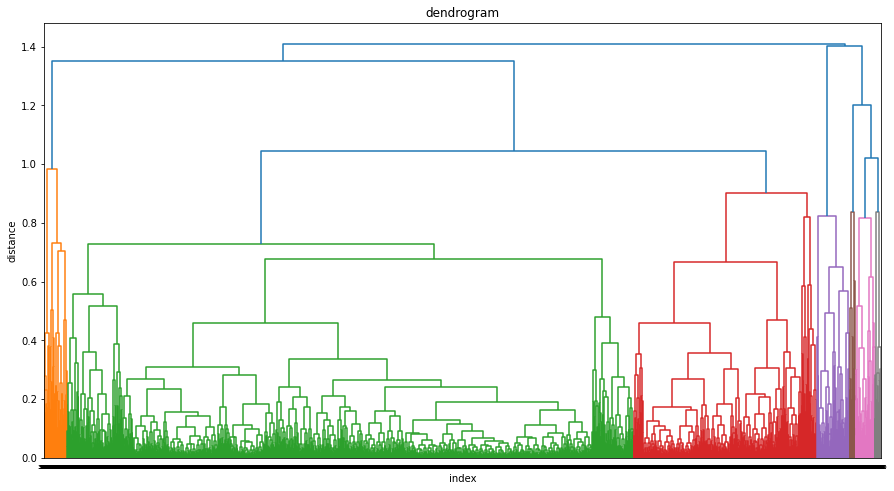

In [152]:
plt.figure(figsize=(15,8));plt.title('dendrogram');plt.xlabel('index');plt.ylabel('distance')
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=5)
plt.show()

In [153]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='complete').fit(air_normalized)
hc.labels_

array([1, 1, 1, ..., 1, 1, 3], dtype=int64)

In [154]:
cluster_labels=pd.Series(hc.labels_)

In [155]:
airlines['clust']=cluster_labels
airlines.head()

,Unnamed: 0,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award?,clust
0,1,28143,1,1,1,174,1,7000,0,1
1,2,19244,1,1,1,215,2,6968,0,1
2,3,41354,1,1,1,4123,4,7034,0,1
3,4,14776,1,1,1,500,1,6952,0,1
4,5,97752,4,1,1,43300,26,6935,1,1


In [156]:
airlines.iloc[:,0:].groupby(airlines.clust).mean()

,Unnamed: 0,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award?,clust
clust,,,,,,,,,,
0,1485.033113,3963.841060,1.013245,1.000000,1.000000,741.768212,2.602649,5118.490066,0.178808,0.0
1,1998.018415,81032.206473,2.078962,1.015346,1.009487,17003.077846,12.013393,4155.720982,0.361607,1.0
2,1817.233766,19343.733766,3.389610,1.019481,1.097403,48470.285714,17.980519,4440.974026,1.000000,2.0
3,3566.100000,3043.690909,1.000000,1.000000,1.000000,425.254545,1.618182,1083.754545,0.036364,3.0


### We can now clearly see the 4 number of clusters formed, which can be described as under

    1. Cluster1 = "0" = Defines the group of fliers that earn and eligible for award travel but are the third most frequent fliers
    2. Cluster2 = "1" = Defines the group of fliers that earn and eligible for award travel but are the most frequent fliers
    3. Cluster3 = "2" = Defines the group of fliers that earn and eligible for award travel but are the second most frequent fliers
    4. Cluster4 = "3" = Defines the group of fliers that earn the least and are the least frequent fliers

In [185]:
# perform clustering by K-MEANS method for airlines data set

In [160]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

In [161]:
airlines1=pd.read_csv("F:\\excelR\\assignments\\clustring\\EastWestAirlines.csv")
airlines1

,Unnamed: 0,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [162]:
air2=airlines1
air2.drop(["Qual_miles","Flight_miles_12mo","Flight_trans_12"],axis=1,inplace=True)
air2.head()

,Unnamed: 0,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Days_since_enroll,Award?
0,1,28143,1,1,1,174,1,7000,0
1,2,19244,1,1,1,215,2,6968,0
2,3,41354,1,1,1,4123,4,7034,0
3,4,14776,1,1,1,500,1,6952,0
4,5,97752,4,1,1,43300,26,6935,1


In [163]:
air2_normalized=preprocessing.normalize(air2)
print(air2_normalized)

[[3.44815547e-05 9.70414393e-01 3.44815547e-05 ... 3.44815547e-05
  2.41370883e-01 0.00000000e+00]
 [9.77144636e-05 9.40208568e-01 4.88572318e-05 ... 9.77144636e-05
  3.40437191e-01 0.00000000e+00]
 [7.11742344e-05 9.81113097e-01 2.37247448e-05 ... 9.48989792e-05
  1.66879855e-01 0.00000000e+00]
 ...
 [5.15333231e-02 9.43691958e-01 3.84672728e-05 ... 1.02579394e-04
  1.79770388e-02 1.28224243e-05]
 [7.30031962e-02 9.96965788e-01 1.81599991e-05 ... 1.81599991e-05
  2.54421587e-02 0.00000000e+00]
 [7.70720943e-01 5.78088626e-01 1.91673948e-04 ... 0.00000000e+00
  2.67960179e-01 0.00000000e+00]]


In [164]:
TWSS=[]
k=list(range(2,8))

for i in k:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(air2_normalized)
    TWSS.append(kmeans.inertia_)
    
TWSS

[355.78140011106046,
 239.96398127649215,
 184.51879828035194,
 146.01445900634528,
 122.9493333223616,
 103.34322959671022]

Text(0, 0.5, 'total_within_SS')

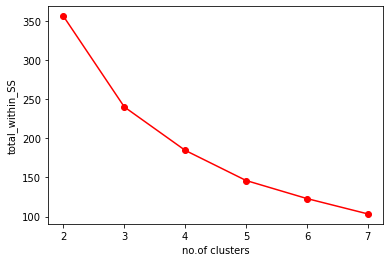

In [165]:
plt.plot(k,TWSS,'ro-');plt.xlabel('no.of clusters');plt.ylabel('total_within_SS')

In [166]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters, 
# as the curve is seemingly bent or showinf an elbow format at K = 4


In [167]:
model=KMeans(n_clusters=4)
model.fit(air2_normalized)

KMeans(n_clusters=4)

In [168]:
model.labels_

array([3, 3, 3, ..., 1, 3, 2])

In [180]:
md=pd.Series(model.labels_)
air_maindf=pd.read_csv("F:\\excelR\\assignments\\clustring\\EastWestAirlines.csv")
air_maindf['clust']=md

In [181]:
md

0       3
1       3
2       3
3       3
4       1
       ..
3994    1
3995    3
3996    1
3997    3
3998    2
Length: 3999, dtype: int32

In [182]:
air_maindf.head()

,Unnamed: 0,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1


In [183]:
df=air_maindf.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]

In [178]:
df.head()

,clust,Unnamed: 0,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,3,1,28143,0,1,1,1,174,1,0,0,7000,0
1,3,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,1,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [184]:
df.iloc[:,1:12].groupby(air_maindf.clust).mean()

,Unnamed: 0,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clust,,,,,,,,,,,
0,1896.113372,28167.703488,118.511628,3.299419,1.034884,1.072674,42793.354651,17.889535,681.947674,1.909884,4316.450581
1,1991.219442,74209.042348,114.636189,3.179018,1.025024,1.019249,33001.408085,17.903754,457.669875,1.346487,4167.191530
2,2429.792332,4010.888179,17.284345,1.003195,1.000000,1.000000,761.913738,2.891374,53.690096,0.226837,3313.472843
3,1986.798958,89571.609205,178.475467,1.512809,1.008684,1.001737,8386.619192,9.003474,483.217108,1.461572,4176.478941


### We can now clearly see the 4 number of clusters formed, which can be described as under

    1. Cluster1 = "0" = Defines the group of fliers that earn and eligible for award travel but are the least frequent fliers
    2. Cluster2 = "1" = Defines the group of fliers that earn and eligible for award travel but are the second most frequent fliers
    3. Cluster3 = "2" = Defines the group of fliers that earn and eligible for award travel but are the third most frequent fliers
    4. Cluster4 = "3" = Defines the group of fliers that earn the least and are the most frequent fliers